# Student Performance Indicator

In [1]:
# Life cycle of Machine learning Project

# 1.Understanding the Problem Statement
# 2.Data Collection
# 3.Data Checks to perform
# 4.Exploratory data analysis
# 5.Data Pre-Processing
# 6.Model Training
# 7.Choose best model

# Problem statement

In [2]:
# This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education,
# Lunch and Test preparation course

## Import Data and Required Packages

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

## import the CSV Data as Pandas DataFrame

In [4]:
df = pd.read_csv(r'E:\Student Performance Prediction\notebook\StudentsPerformance.csv')

## Show Top 5 Records

In [5]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Shape of the dataset

In [6]:
df.shape

(1000, 8)

## Dataset information

In [7]:
# gender : sex of students -> (Male/female)
# race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
# parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
# lunch : having lunch before test (standard or free/reduced)
# test preparation course : complete or not complete before test
# math score
# reading score
# writing score

## Data Checks to perform

In [8]:
# Check Missing values
# Check Duplicates
# Check data type
# Check the number of unique values of each column
# Check statistics of data set
# Check various categories present in the different categorical column

## Check Missing values

In [9]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

#### There are no missing values in the data set

## Check Duplicates

In [10]:
df.duplicated().sum()

0

#### There are no duplicates values in the data set

## Check data types

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


## Checking the number of unique values of each column

In [12]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

## Check statistics of data set

In [13]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


### Insight
##### From above description of numerical data, all means are very close to each other - between 66 and 68.05;
##### All standard deviations are also close - between 14.6 and 15.19;
##### While there is a minimum score 0 for math, for writing minimum is much higher = 10 and for reading myet higher = 17

##  Exploring Data

In [14]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Check Categorical and Numerical Feature

In [15]:
categorical_col = [feature for feature in df.columns if df[feature].dtype=='object']
numerical_col =   [feature for feature in df.columns if df[feature].dtype!='object']

print("The Number of Categorical Features are {} and Features --> {}".format(len(categorical_col),categorical_col))
print("The Number of Numerical Features are {} and Features   --> {}".format(len(numerical_col),numerical_col))


The Number of Categorical Features are 5 and Features --> ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
The Number of Numerical Features are 3 and Features   --> ['math score', 'reading score', 'writing score']


## Check Each Column Categories

In [16]:
print("Number of categories in 'gender' variable --> {}".format(df['gender'].unique()))
print()
print("Number of categories in 'race/ethnicity' variable --> {}".format(df['race/ethnicity'].unique()))
print()
print("Number of categories in 'lunch' variable --> {}".format(df['lunch'].unique()))
print()
print("Number of categories in 'test preparation course' variable --> {}".format(df['test preparation course'].unique()))
print()
print("Number of categories in 'parental level of education' variable --> {}".format(df['parental level of education'].unique()))

Number of categories in 'gender' variable --> ['female' 'male']

Number of categories in 'race/ethnicity' variable --> ['group B' 'group C' 'group A' 'group D' 'group E']

Number of categories in 'lunch' variable --> ['standard' 'free/reduced']

Number of categories in 'test preparation course' variable --> ['none' 'completed']

Number of categories in 'parental level of education' variable --> ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']


## Create New Columns Total Score and Avg Score

In [17]:
df['total_score'] = df['math score']+df['reading score']+df['writing score']
df['avg_score'] = (df['math score']+df['reading score']+df['writing score'])/3

## Check Number of students achieves 100 out of 100 marks in math, reading, writing

In [18]:
math_full =df[df['math score']==100]['avg_score'].count()
reading_full = df[df['reading score']==100]['avg_score'].count()
writing_full = df[df['writing score']==100]['avg_score'].count()

print("Math Student Count Full Marks {}".format((math_full)))
print("Reading Student Count Full Marks {}".format((reading_full)))
print("Writing Student Count Full Marks {}".format((writing_full)))

Math Student Count Full Marks 7
Reading Student Count Full Marks 17
Writing Student Count Full Marks 14


## Check Number of students achieves less than and equal to 20 marks in math, reading, writing

In [19]:
math_less_20 =df[df['math score']<=20]['avg_score'].count()
reading_less_20 = df[df['reading score']<=20]['avg_score'].count()
writing_less_20 = df[df['writing score']<=20]['avg_score'].count()

print("Math Student Count less than and equal to 20 Marks {}".format((math_less_20)))
print("Reading Student Count less than and equal to 20 Marks {}".format((reading_less_20)))
print("Writing Student Count less than and equal to 20 Marks {}".format((writing_less_20)))

Math Student Count less than and equal to 20 Marks 4
Reading Student Count less than and equal to 20 Marks 1
Writing Student Count less than and equal to 20 Marks 3


### Insights
###### From above values we get students have performed the worst in Maths
###### Best performance is in reading section

#  Exploring Data ( Visualization )

### Check Graph of avg and total score with female and male find conclusion

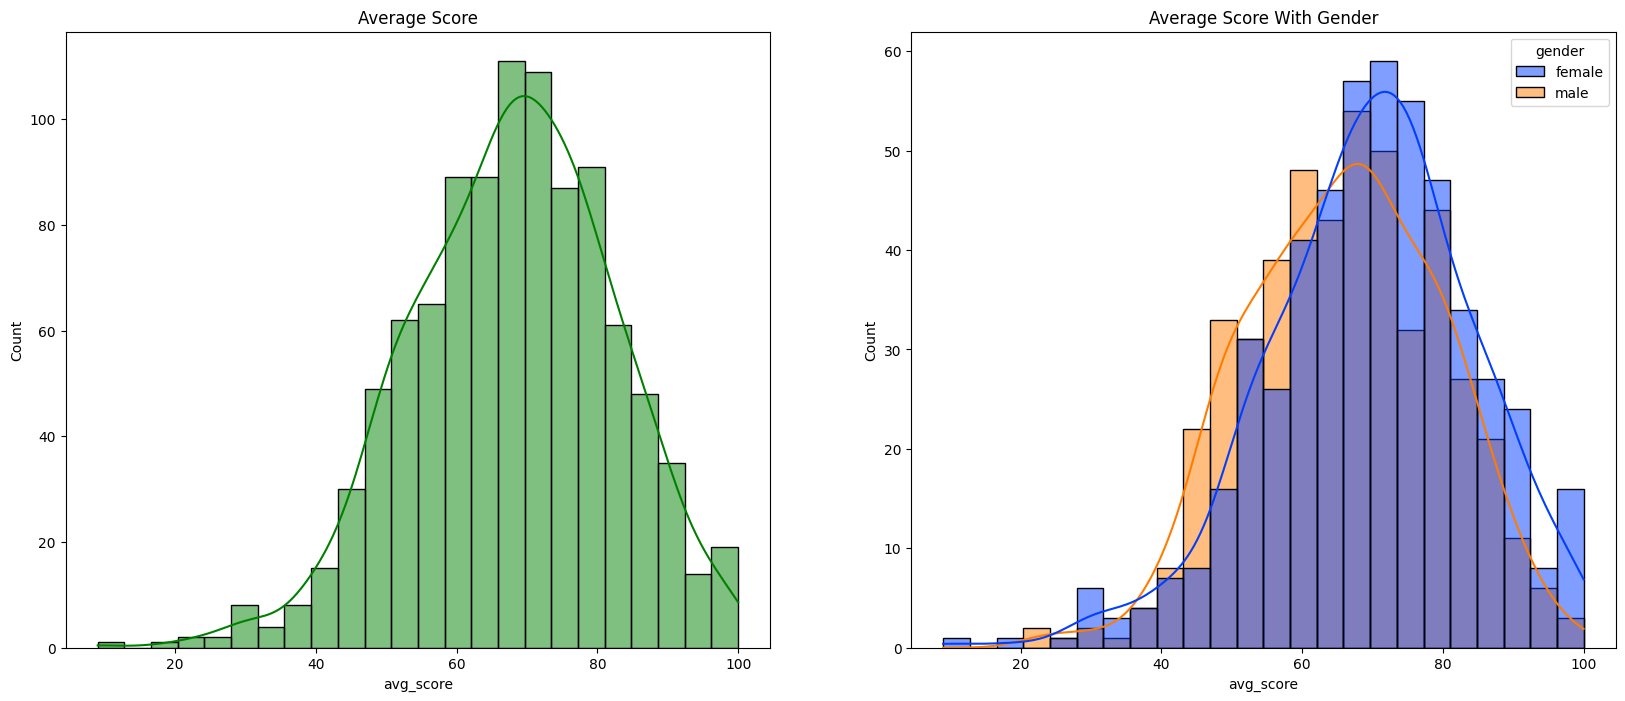

In [24]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.histplot(data=df,x=df['avg_score'],palette='bright',color='g',ax=ax[0],kde=True)
ax[0].set_title("Average Score")

sns.histplot(data=df,x=df['avg_score'],palette='bright',color='g',ax=ax[1],kde=True,hue=df['gender'])
ax[1].set_title("Average Score With Gender")

plt.show()


##### Female is More Intelligent From the Male in Averag Score Graph Re-presentation

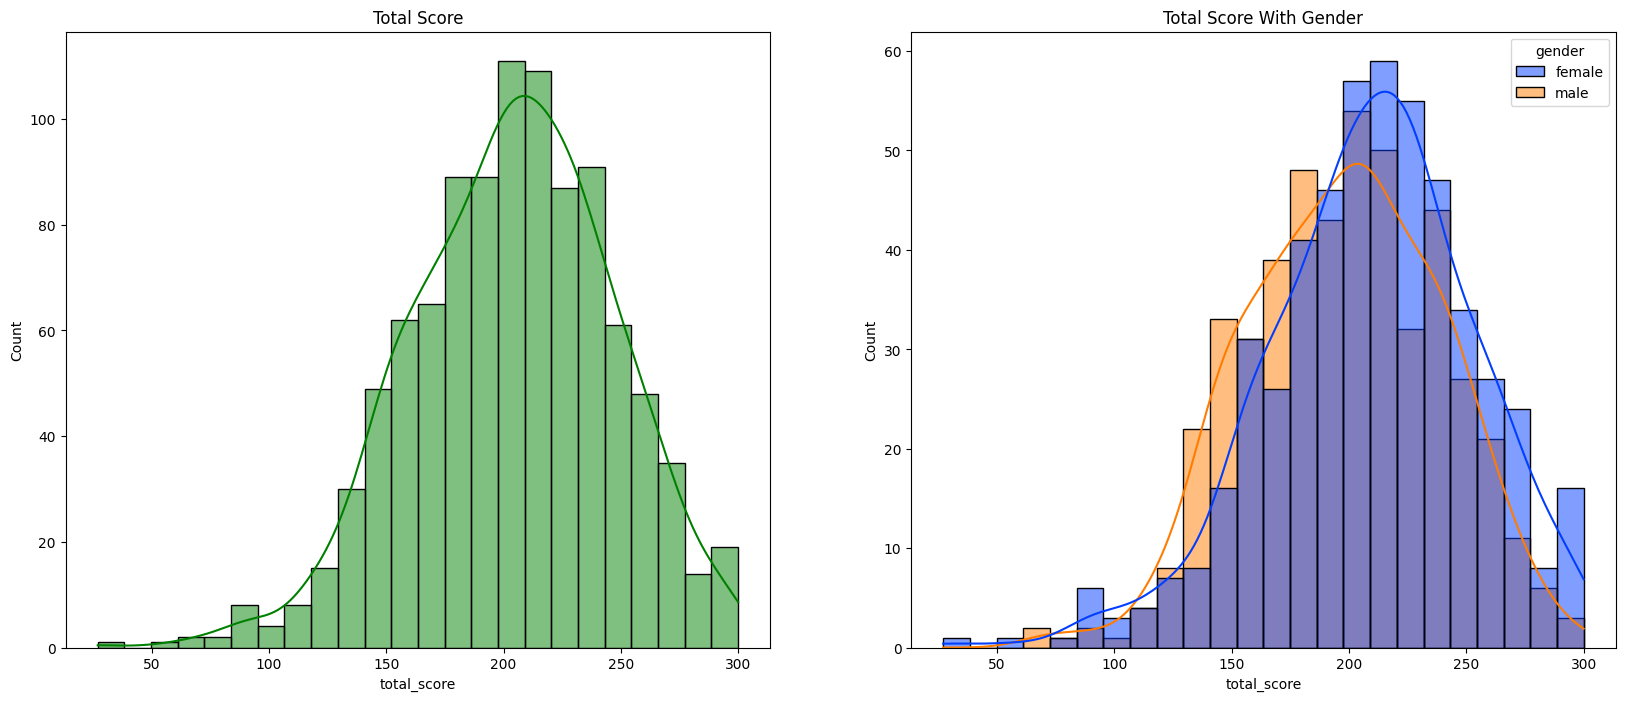

In [25]:
fig,ax = plt.subplots(1,2,figsize=(20,8))

sns.histplot(data=df,x=df['total_score'],palette='bright',color='g',ax=ax[0],kde=True)
ax[0].set_title("Total Score")

sns.histplot(data=df,x=df['total_score'],palette='bright',color='g',ax=ax[1],kde=True,hue=df['gender'])
ax[1].set_title("Total Score With Gender")

plt.show()

##### Female is More Intelligent From the Male in Total Score Graph Re-presentation

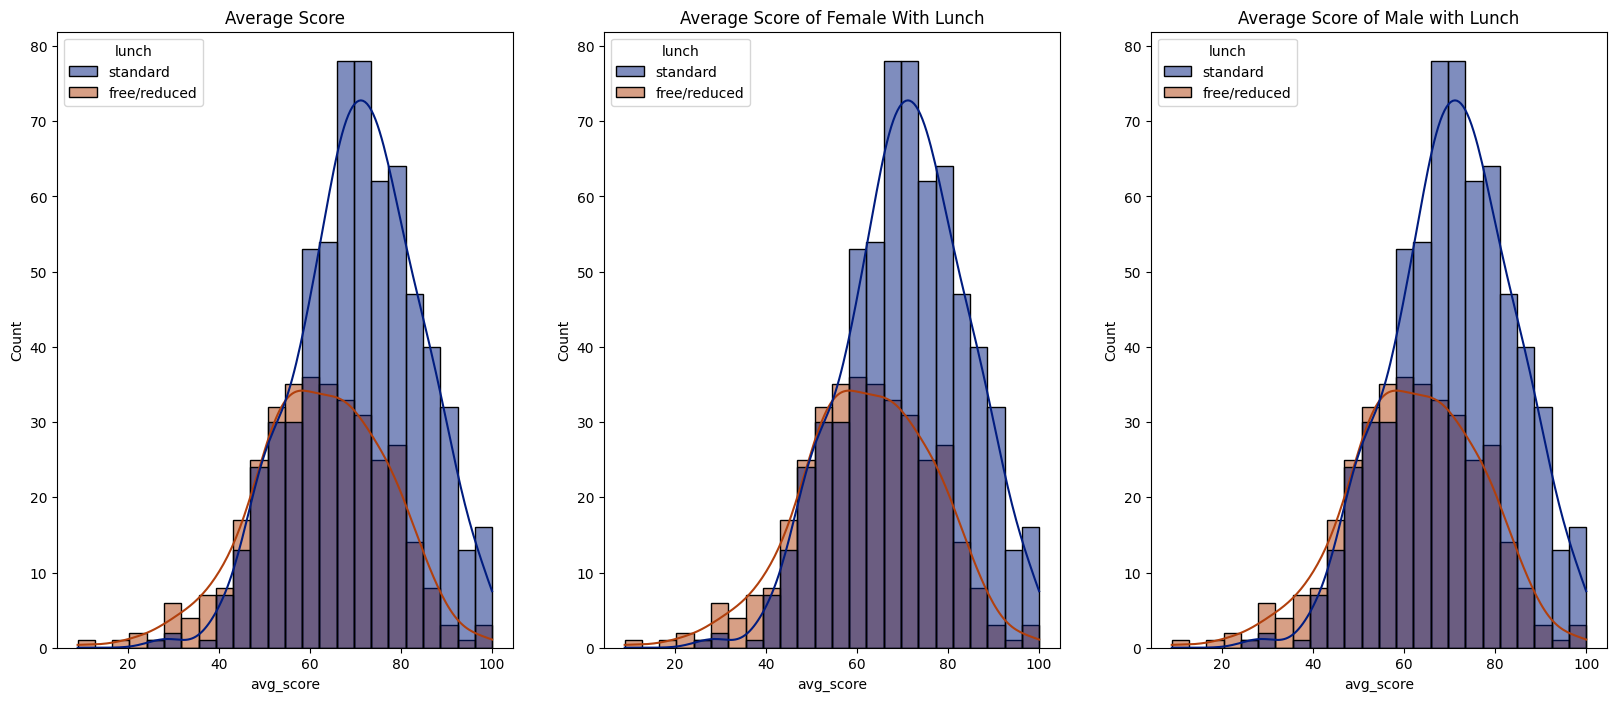

In [28]:

fig,ax = plt.subplots(1,3,figsize=(20,8))

sns.histplot(data=df,x=df['avg_score'],palette='dark',color='g',ax=ax[0],kde=True,hue=df['lunch'])
ax[0].set_title("Average Score")

sns.histplot(data=df[df['gender']=='female'],x=df['avg_score'],palette='dark',color='g',ax=ax[1],kde=True,hue=df['lunch'])
ax[1].set_title("Average Score of Female With Lunch")

sns.histplot(data=df[df['gender']=='male'],x=df['avg_score'],palette='dark',color='g',ax=ax[2],kde=True,hue=df['lunch'])
ax[2].set_title("Average Score of Male with Lunch")

plt.show()

### Insights
###### Standard lunch helps perform well in exams.
###### Standard lunch helps perform well in exams be it a male or a female.

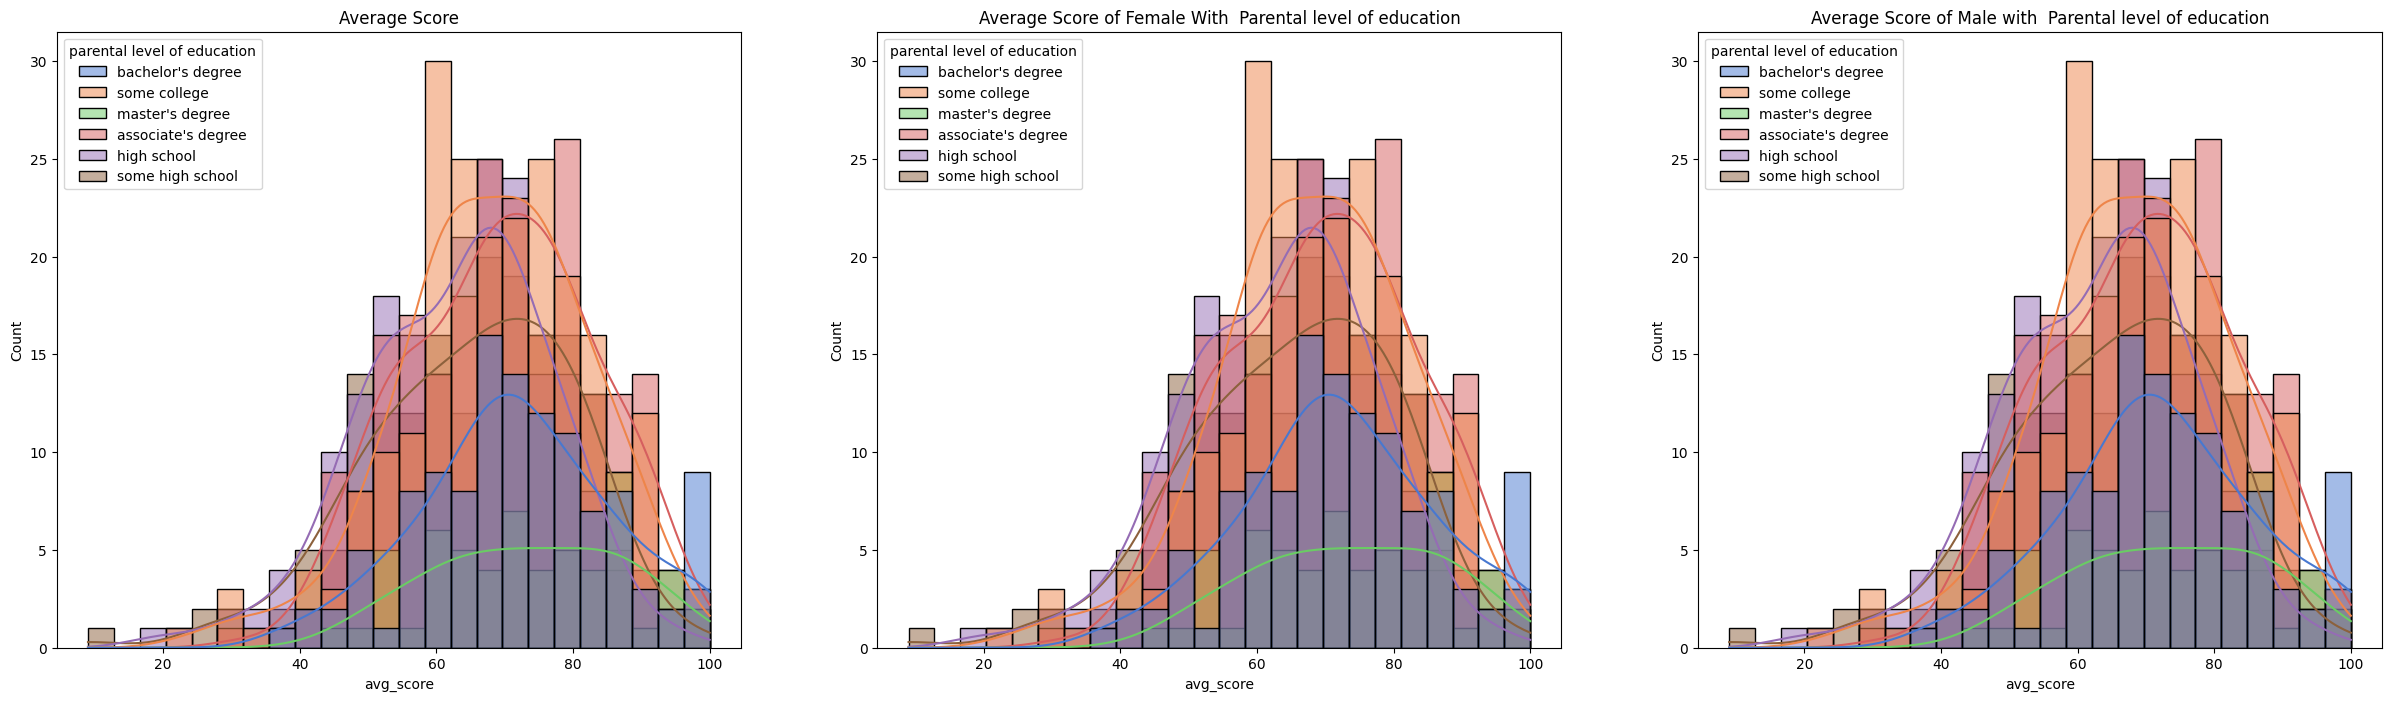

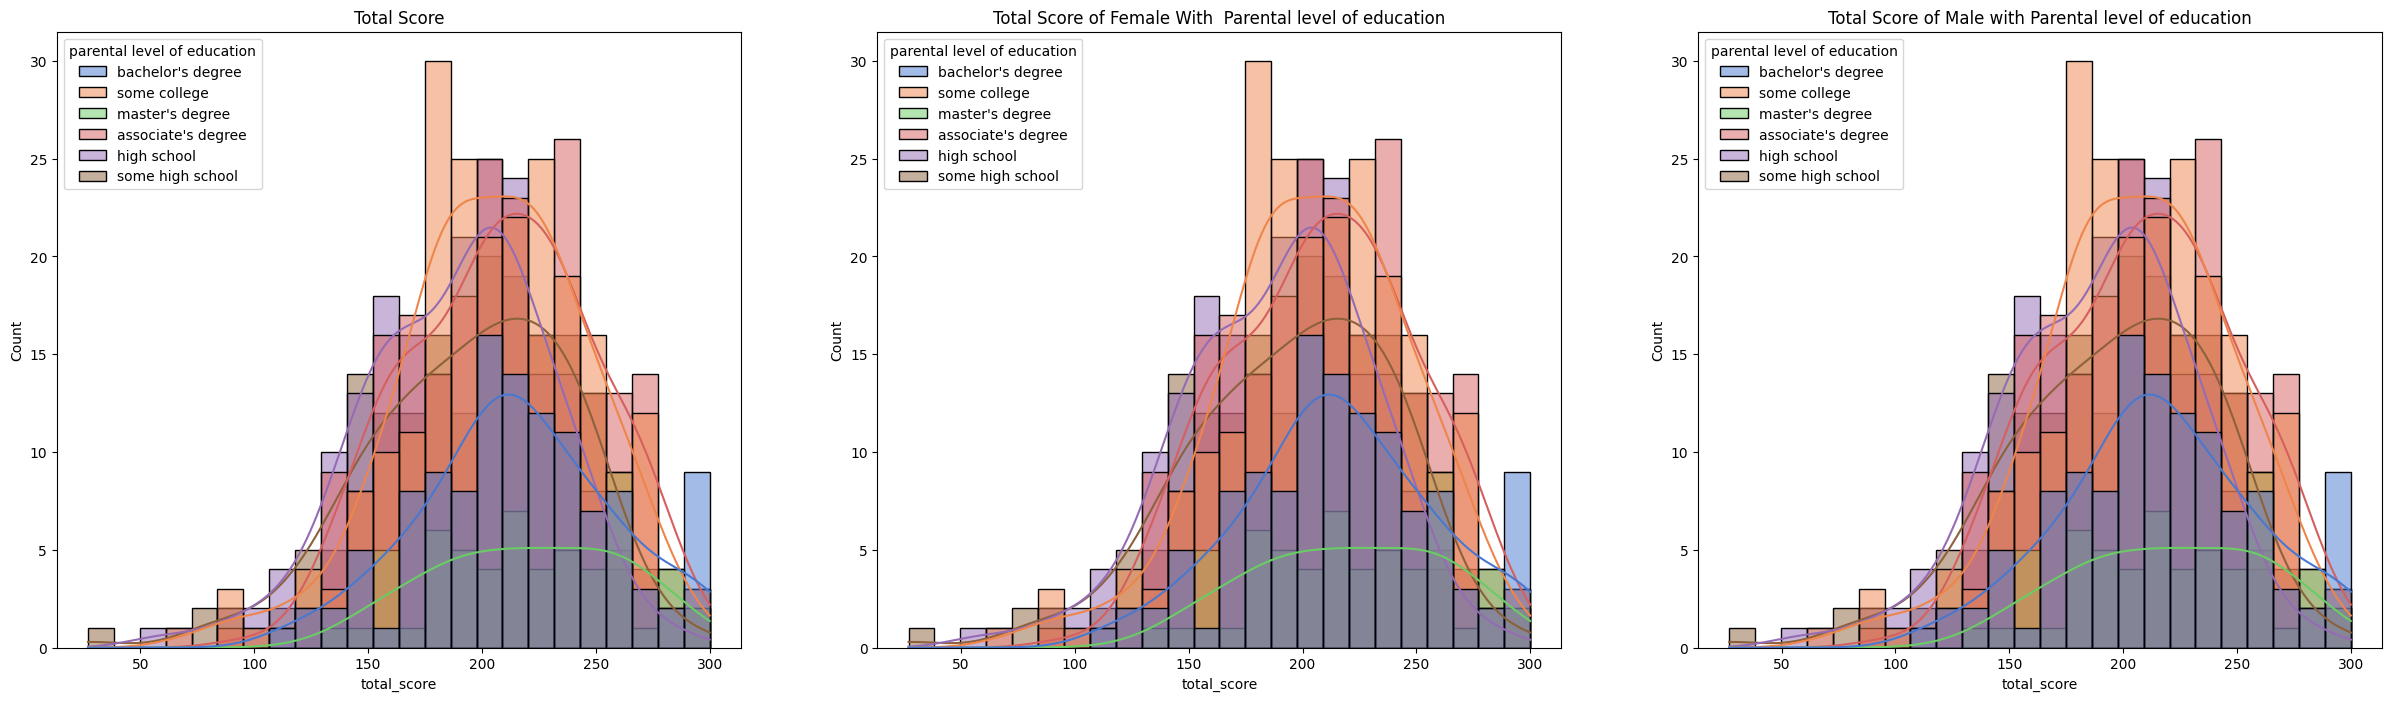

In [34]:

fig,ax = plt.subplots(1,3,figsize=(30,8))

sns.histplot(data=df,x=df['avg_score'],palette='muted',color='g',ax=ax[0],kde=True,hue=df['parental level of education'])
ax[0].set_title("Average Score")

sns.histplot(data=df[df['gender']=='female'],x=df['avg_score'],palette='muted',color='g',ax=ax[1],kde=True,hue=df['parental level of education'])
ax[1].set_title("Average Score of Female With  Parental level of education")

sns.histplot(data=df[df['gender']=='male'],x=df['avg_score'],palette='muted',color='g',ax=ax[2],kde=True,hue=df['parental level of education'])
ax[2].set_title("Average Score of Male with  Parental level of education")

plt.show()


fig,ax = plt.subplots(1,3,figsize=(30,8))

sns.histplot(data=df,x=df['total_score'],palette='muted',color='g',ax=ax[0],kde=True,hue=df['parental level of education'])
ax[0].set_title("Total Score")

sns.histplot(data=df[df['gender']=='female'],x=df['total_score'],palette='muted',color='g',ax=ax[1],kde=True,hue=df['parental level of education'])
ax[1].set_title("Total Score of Female With  Parental level of education")

sns.histplot(data=df[df['gender']=='male'],x=df['total_score'],palette='muted',color='g',ax=ax[2],kde=True,hue=df['parental level of education'])
ax[2].set_title("Total Score of Male with Parental level of education")

plt.show()

###### In general parent's education don't help student perform well in exam.
###### 2nd plot shows that parent's whose education is of associate's degree or master's degree their male child tend to perform well in exam
###### 3rd plot we can see there is no effect of parent's education on female students.

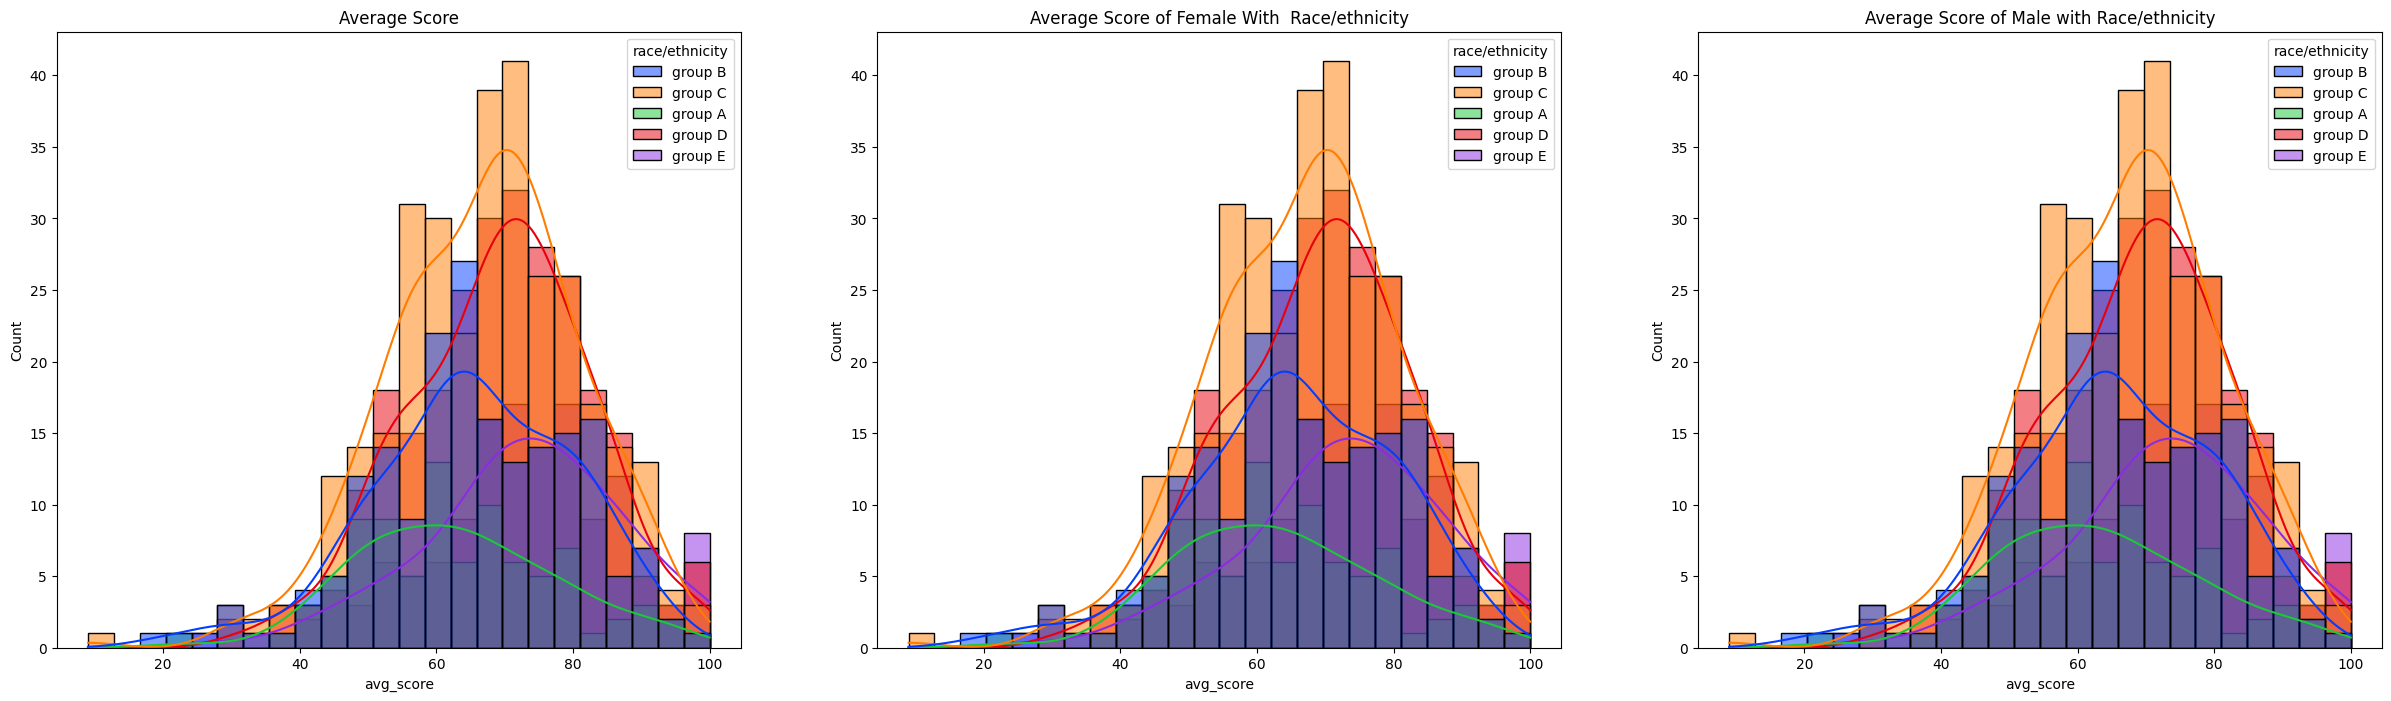

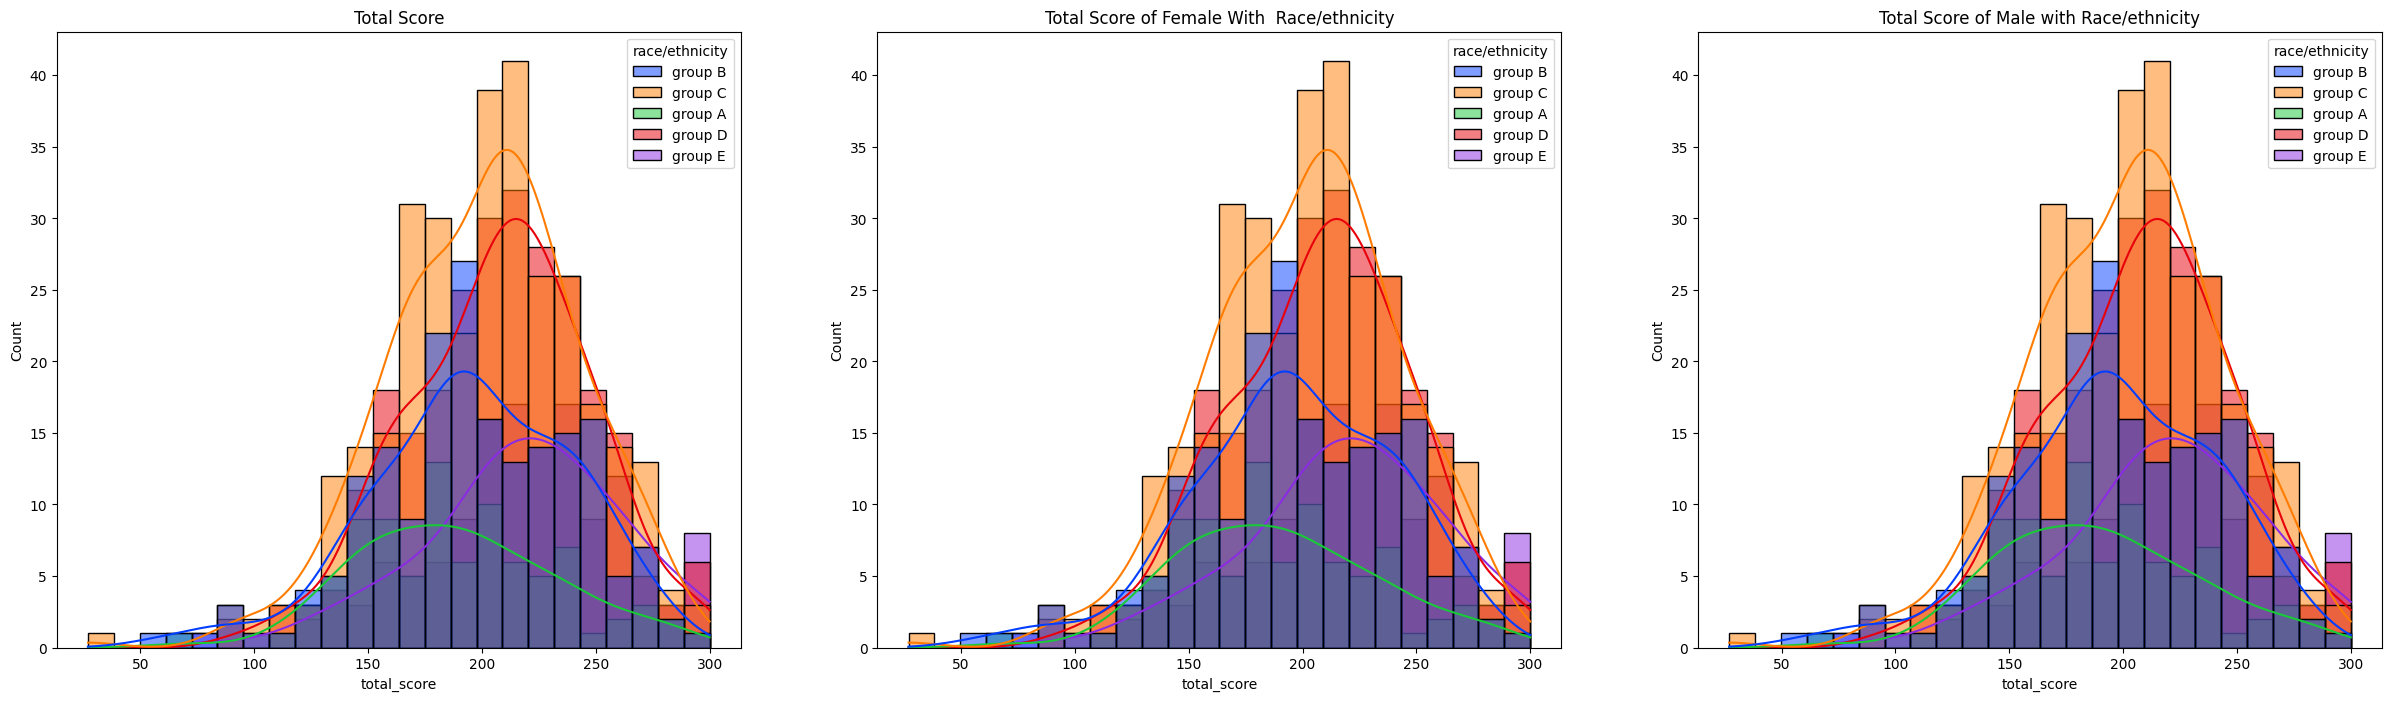

In [39]:
fig,ax = plt.subplots(1,3,figsize=(30,8))

sns.histplot(data=df,x=df['avg_score'],palette='bright',color='g',ax=ax[0],kde=True,hue=df['race/ethnicity'])
ax[0].set_title("Average Score")

sns.histplot(data=df[df['gender']=='female'],x=df['avg_score'],palette='bright',color='g',ax=ax[1],kde=True,hue=df['race/ethnicity'])
ax[1].set_title("Average Score of Female With  Race/ethnicity")

sns.histplot(data=df[df['gender']=='male'],x=df['avg_score'],palette='bright',color='g',ax=ax[2],kde=True,hue=df['race/ethnicity'])
ax[2].set_title("Average Score of Male with Race/ethnicity")

plt.show()


fig,ax = plt.subplots(1,3,figsize=(30,8))

sns.histplot(data=df,x=df['total_score'],palette='bright',ax=ax[0],kde=True,hue=df['race/ethnicity'])
ax[0].set_title("Total Score")

sns.histplot(data=df[df['gender']=='female'],x=df['total_score'],palette='bright',ax=ax[1],kde=True,hue=df['race/ethnicity'])
ax[1].set_title("Total Score of Female With  Race/ethnicity")

sns.histplot(data=df[df['gender']=='male'],x=df['total_score'],palette='bright',ax=ax[2],kde=True,hue=df['race/ethnicity'])
ax[2].set_title("Total Score of Male with Race/ethnicity")

plt.show()

##### Students of group A and group B tends to perform poorly in exam.
##### Students of group A and group B tends to perform poorly in exam irrespective of whether they are male or female

In [40]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,avg_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.000000
996,male,group C,high school,free/reduced,none,62,55,55,172,57.333333
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.000000
998,female,group D,some college,standard,completed,68,78,77,223,74.333333


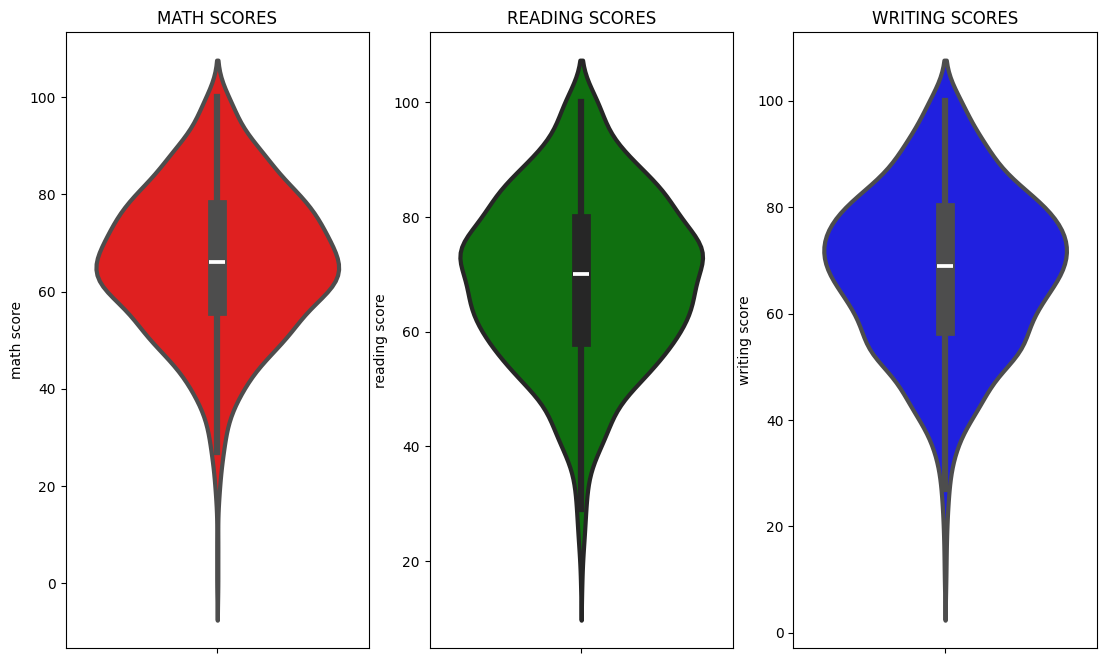

In [41]:
plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.violinplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.violinplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.violinplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

## Insights
##### From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

# Multivariate analysis using pieplot

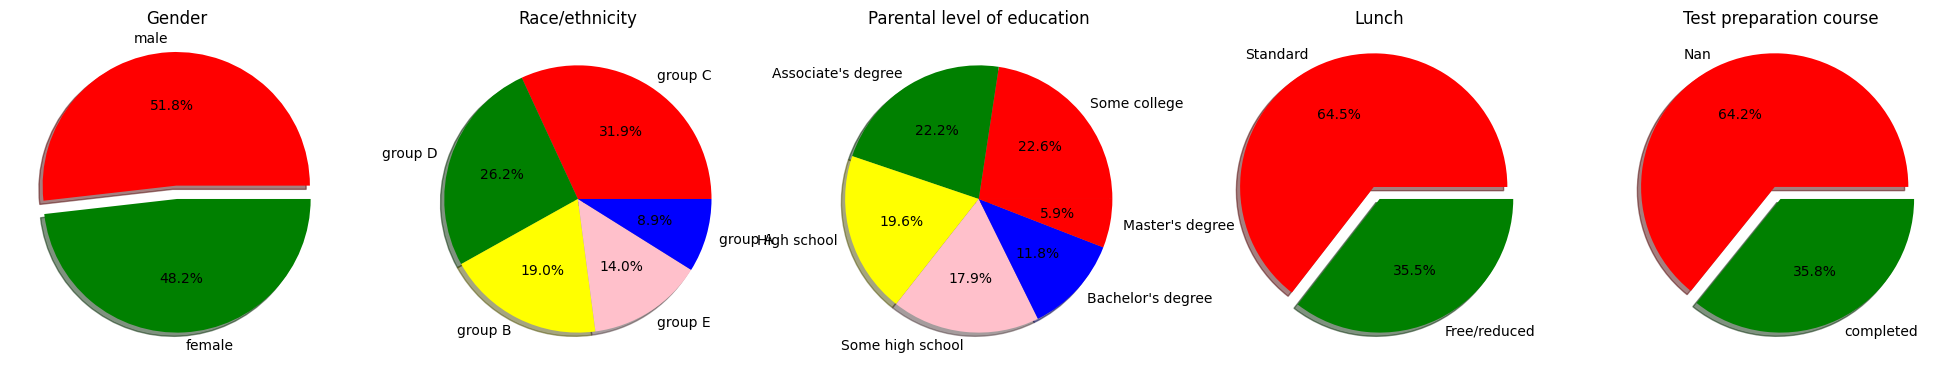

In [61]:
fig,ax = plt.subplots(1,5,figsize=(25,5))

plt.subplot(1,5,1)
ax[0].set_title("Gender")

size = df['gender'].value_counts()
color = ['red','green']
label = ['male','female']

plt.pie(size,labels=label,colors=color,autopct="%1.1f%%",explode=[0.1,0],shadow=True)


plt.subplot(1,5,2)
ax[1].set_title("Race/ethnicity")

size = df['race/ethnicity'].value_counts()
color = ['red','green','yellow','pink','blue']
label = ['group C','group D','group B','group E','group A']

plt.pie(size,labels=label,colors=color,autopct="%1.1f%%",shadow=True)


plt.subplot(1,5,3)
ax[2].set_title("Parental level of education")

size = df['parental level of education'].value_counts()
color = ['red','green','yellow','pink','blue']
label = ['Some college ',"Associate's degree","High school",'Some high school',"Bachelor's degree","Master's degree"]

plt.pie(size,labels=label,colors=color,autopct="%1.1f%%",shadow=True)


plt.subplot(1,5,4)
ax[3].set_title("Lunch")

size = df['lunch'].value_counts()
color = ['red','green']
label = ['Standard','Free/reduced']

plt.pie(size,labels=label,colors=color,autopct="%1.1f%%",explode=[0.1,0],shadow=True)


plt.subplot(1,5,5)
ax[4].set_title("Test preparation course")

size = df['test preparation course'].value_counts()
color = ['red','green']
label = ['Nan','completed']

plt.pie(size,labels=label,colors=color,autopct="%1.1f%%",explode=[0.1,0],shadow=True)

plt.show()


## Insights
##### Number of Male and Female students is almost equal
##### Number students are greatest in Group C
##### Number of students who have standard lunch are greater
##### Number of students who have not enrolled in any test preparation course is greater
##### Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

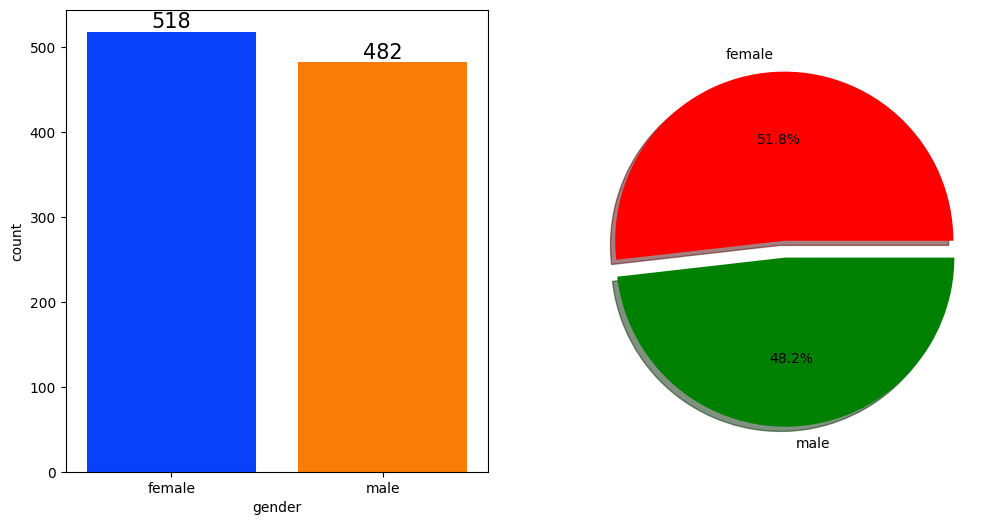

In [74]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df,x=df['gender'],palette='bright',saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=15)

plt.pie(x=df['gender'].value_counts(),labels=df['gender'].value_counts().index,colors=['red','green'],autopct="%1.1f%%",shadow=True,explode=[0,0.1])
plt.show()

## Insights
##### Gender has balanced data with female students are 518 (48%) and male students are 482 (52%)

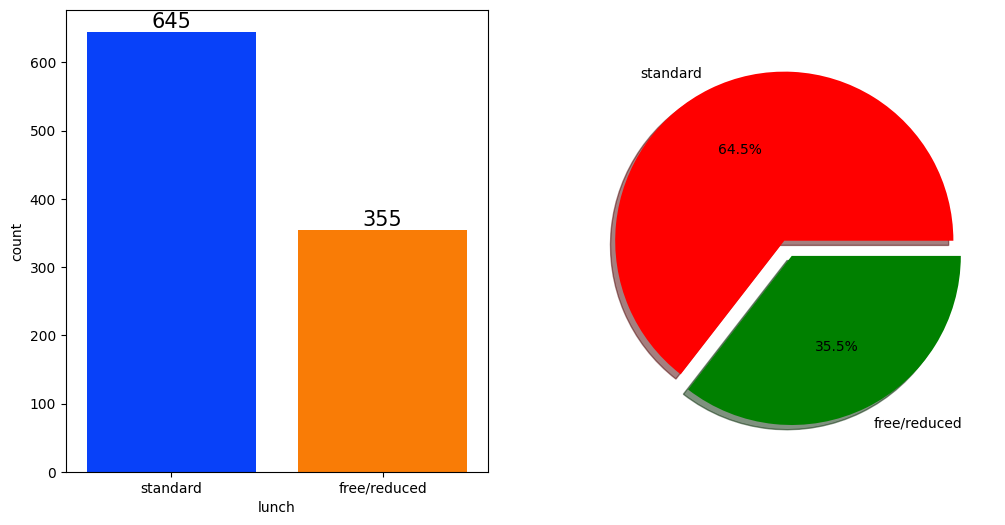

In [75]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df,x=df['lunch'],palette='bright',saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=15)

plt.pie(x=df['lunch'].value_counts(),labels=df['lunch'].value_counts().index,colors=['red','green'],autopct="%1.1f%%",shadow=True,explode=[0,0.1])
plt.show()

## Insights
##### Lunch has not balanced data with  stadard students are 654 (64.5%) and free/reduced are 482 (35.5%)

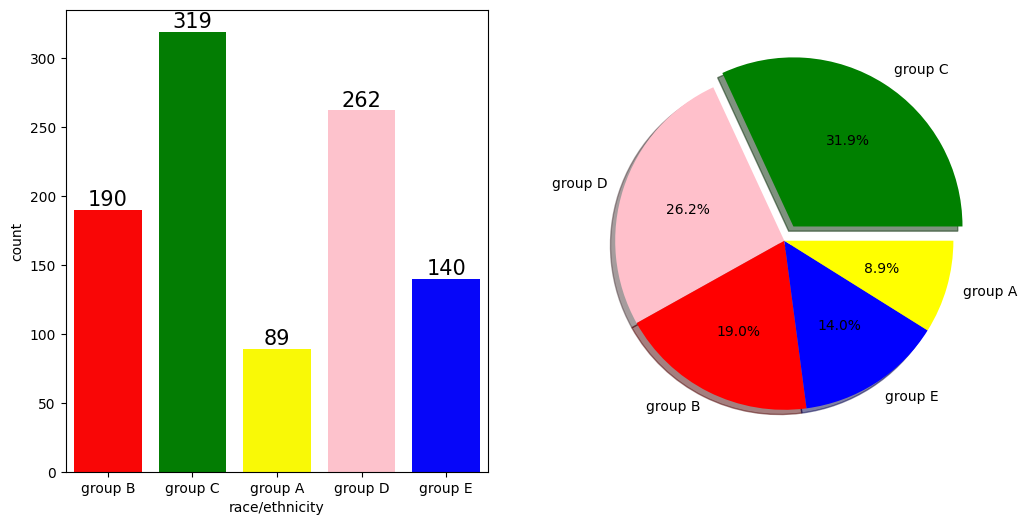

In [86]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df,x=df['race/ethnicity'],palette=['red','green','yellow','pink','blue'],saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=15)

plt.pie(x=df['race/ethnicity'].value_counts(),labels=df['race/ethnicity'].value_counts().index,colors=['green','pink','red','blue','yellow'],autopct="%1.1f%%",shadow=True,explode=[0.1,0,0,0,0])
plt.show()

## Insights
##### Most of the student belonging from group C /group D.
##### Lowest number of students belong to groupA.

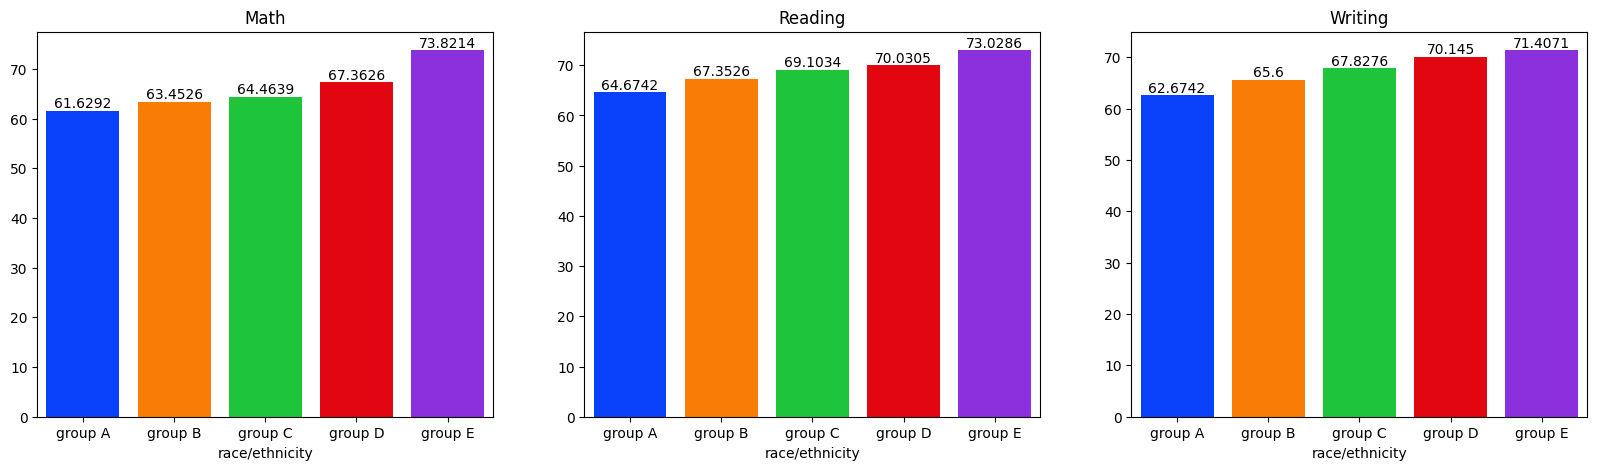

In [104]:
group = df.groupby('race/ethnicity')

fig,ax = plt.subplots(1,3,figsize=(20,5))

ax[0].set_title("Math")
sns.barplot(x=group['math score'].mean().index,y=group['math score'].mean().values,ax=ax[0],palette='bright',saturation=0.95)
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=10)

ax[1].set_title("Reading")
sns.barplot(x=group['reading score'].mean().index,y=group['reading score'].mean().values,ax=ax[1],palette='bright',saturation=0.95)
for container in ax[1].containers:
    ax[1].bar_label(container,color="black",size=10)

ax[2].set_title("Writing")
sns.barplot(x=group['writing score'].mean().index,y=group['writing score'].mean().values,ax=ax[2],palette='bright',saturation=0.95)
for container in ax[2].containers:
    ax[2].bar_label(container,color="black",size=10)

plt.show()


## Insights
###### Group E students have scored the highest marks.
###### Group A students have scored the lowest marks.
###### Students from a lower Socioeconomic status have a lower avg in all course subjects

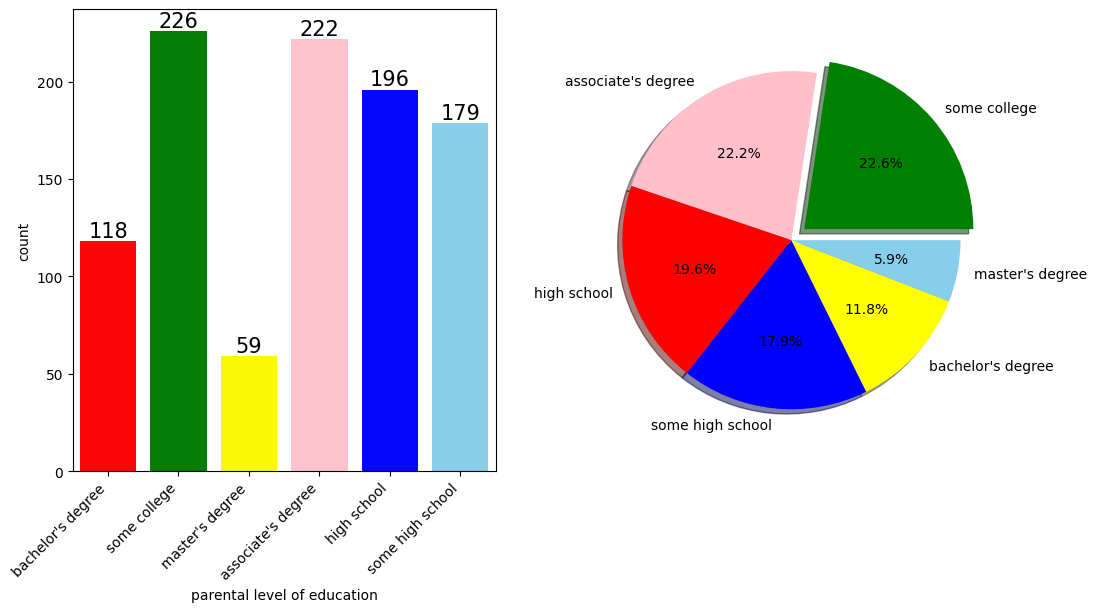

In [110]:
fig,ax = plt.subplots(1,2,figsize=(12,6))

sns.countplot(data=df,x=df['parental level of education'],palette=['red','green','yellow','pink','blue','skyblue'],saturation=0.95,ax=ax[0])
for container in ax[0].containers:
    ax[0].bar_label(container,color="black",size=15)
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45, ha="right", fontsize=10)


plt.pie(x=df['parental level of education'].value_counts(),labels=df['parental level of education'].value_counts().index,colors=['green','pink','red','blue','yellow','skyblue'],autopct="%1.1f%%",shadow=True,explode=[0.1,0,0,0,0,0])
plt.show()

## Insights
##### Largest number of parents are from some college.

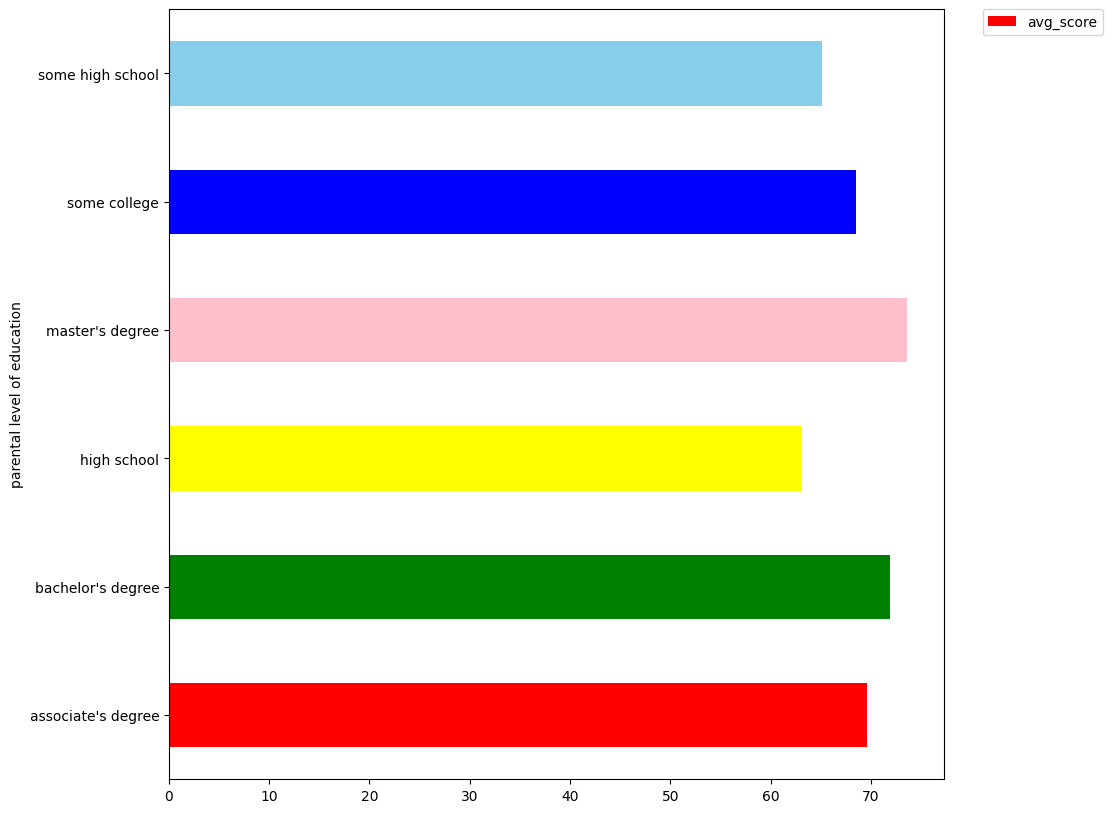

In [125]:
df.groupby('parental level of education')['avg_score'].agg('mean').plot(kind='barh',color=['red','green','yellow','pink','blue','skyblue'],figsize=(10,10),)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

## Insights
###### The score of student whose parents possess master and bachelor level education or association's degree are higher than others.

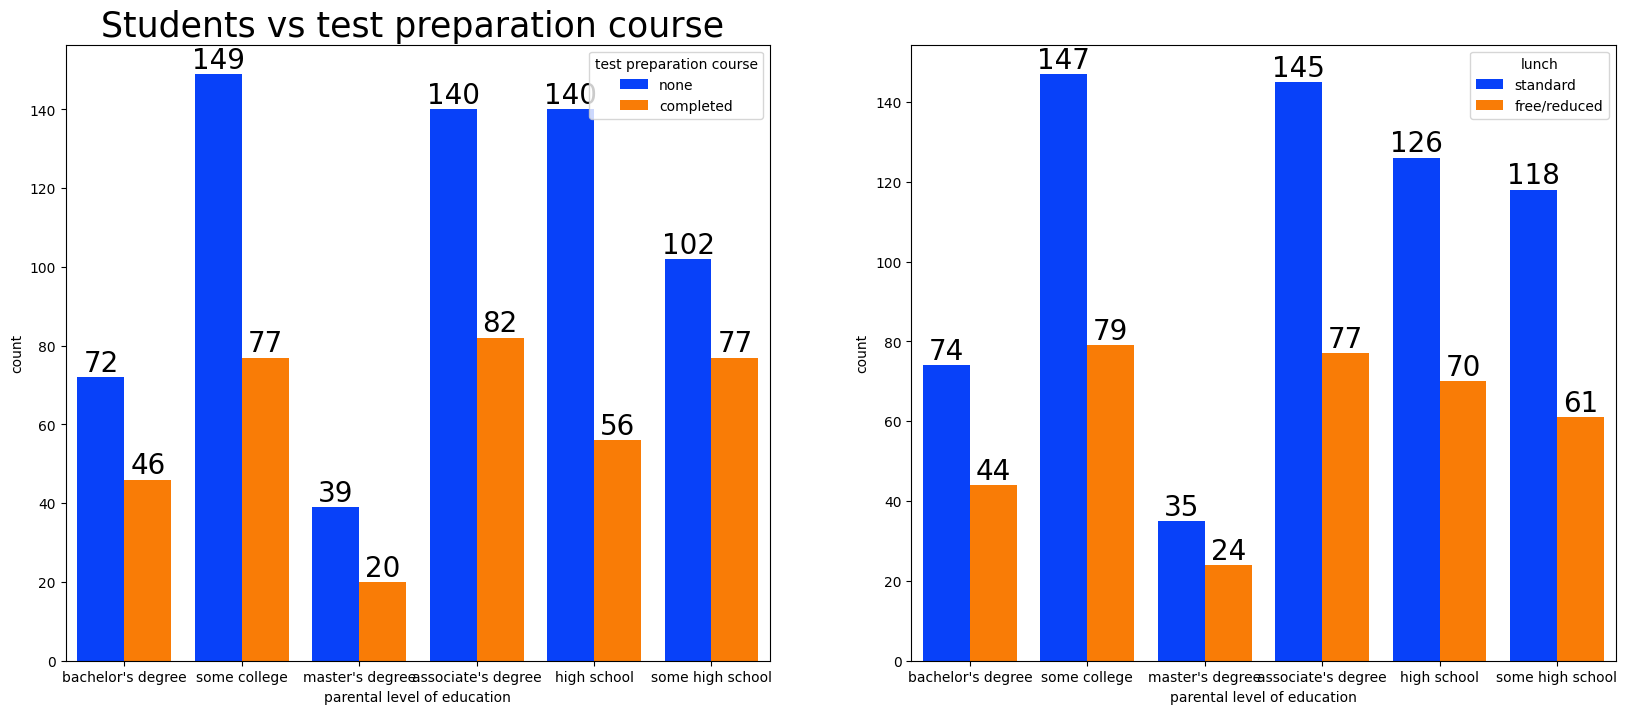

In [126]:
f,ax=plt.subplots(1,2,figsize=(20,8))
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='test preparation course',saturation=0.95,ax=ax[0])
ax[0].set_title('Students vs test preparation course ',color='black',size=25)
for container in ax[0].containers:
    ax[0].bar_label(container,color='black',size=20)
    
sns.countplot(x=df['parental level of education'],data=df,palette = 'bright',hue='lunch',saturation=0.95,ax=ax[1])
for container in ax[1].containers:
    ax[1].bar_label(container,color='black',size=20) 

## Insights
###### Students who get Standard Lunch tend to perform better than students who got free/reduced lunch

<Axes: xlabel='lunch', ylabel='writing score'>

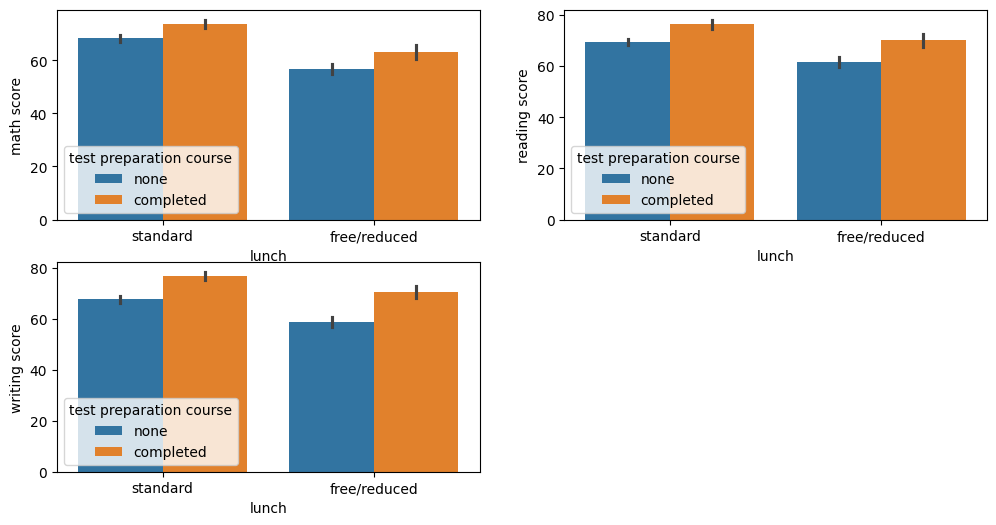

In [127]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot (x=df['lunch'], y=df['math score'], hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot (x=df['lunch'], y=df['reading score'], hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot (x=df['lunch'], y=df['writing score'], hue=df['test preparation course'])

## Insights
##### Students who have completed the Test Prepration Course have scores higher in all three categories than those who haven't taken the course

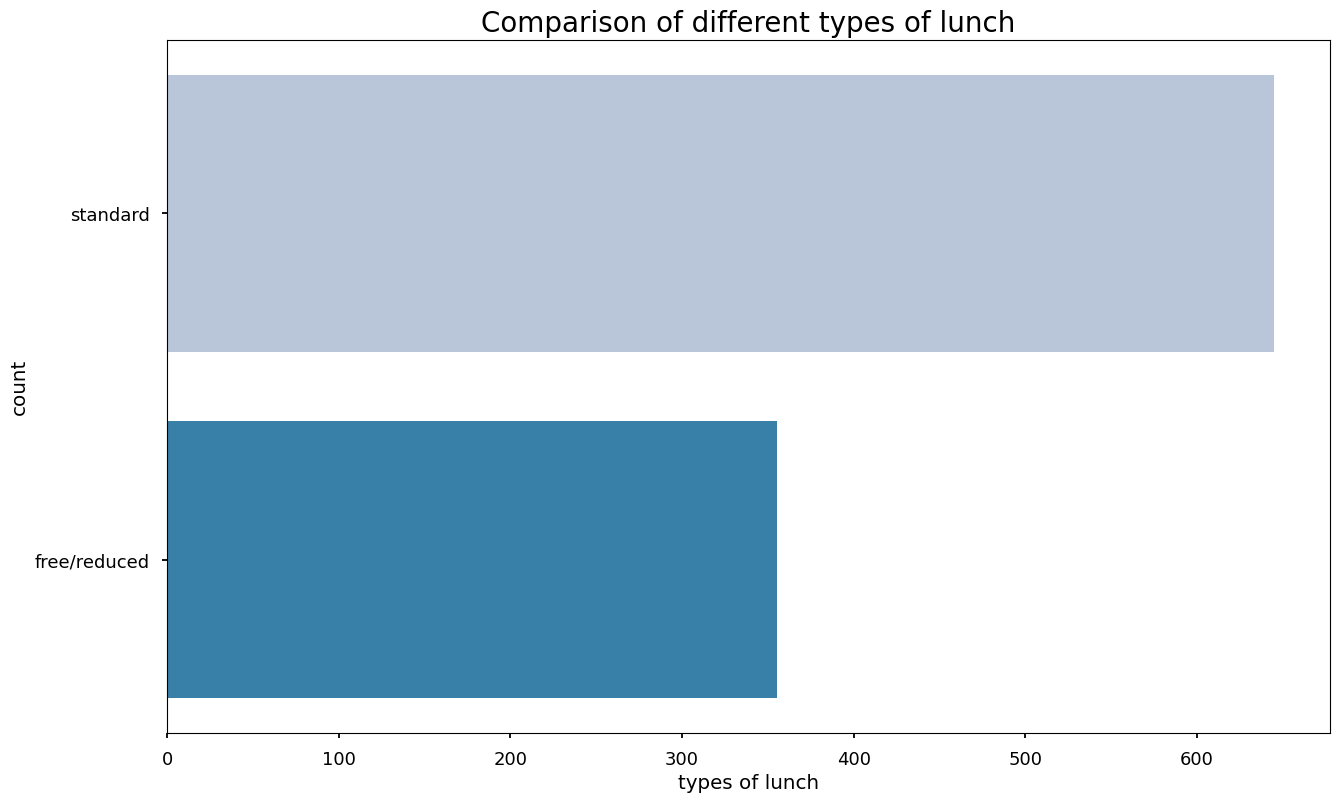

In [130]:
plt.rcParams['figure.figsize'] = (15, 9)
sns.countplot(df['lunch'], palette = 'PuBu')
plt.title('Comparison of different types of lunch', fontweight = 30, fontsize = 20)
plt.xlabel('types of lunch')
plt.ylabel('count')
plt.show()

## Insights
##### Students being served Standard lunch was more than free lunch

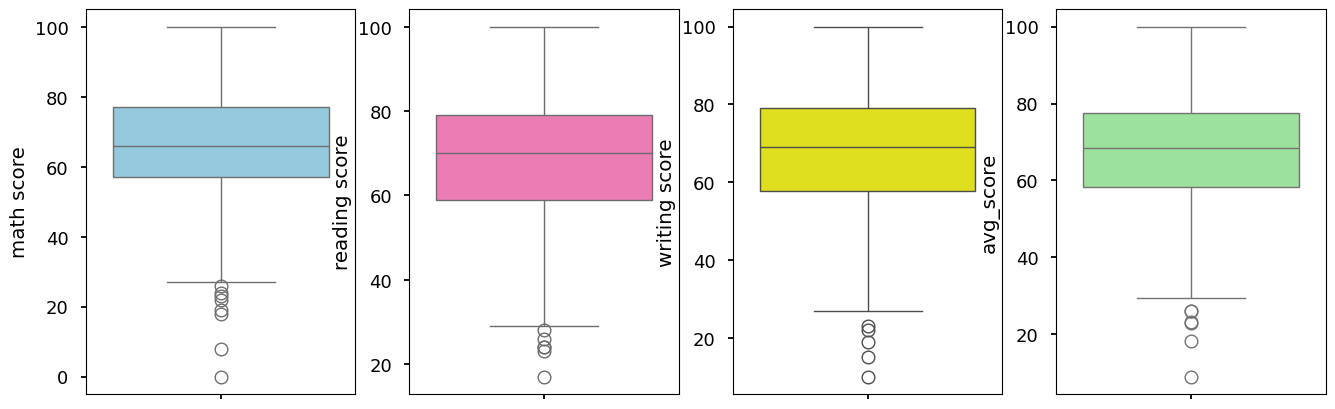

In [132]:
plt.subplots(1,4,figsize=(16,5))
plt.subplot(141)
sns.boxplot(df['math score'],color='skyblue')
plt.subplot(142)
sns.boxplot(df['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(df['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(df['avg_score'],color='lightgreen')
plt.show()

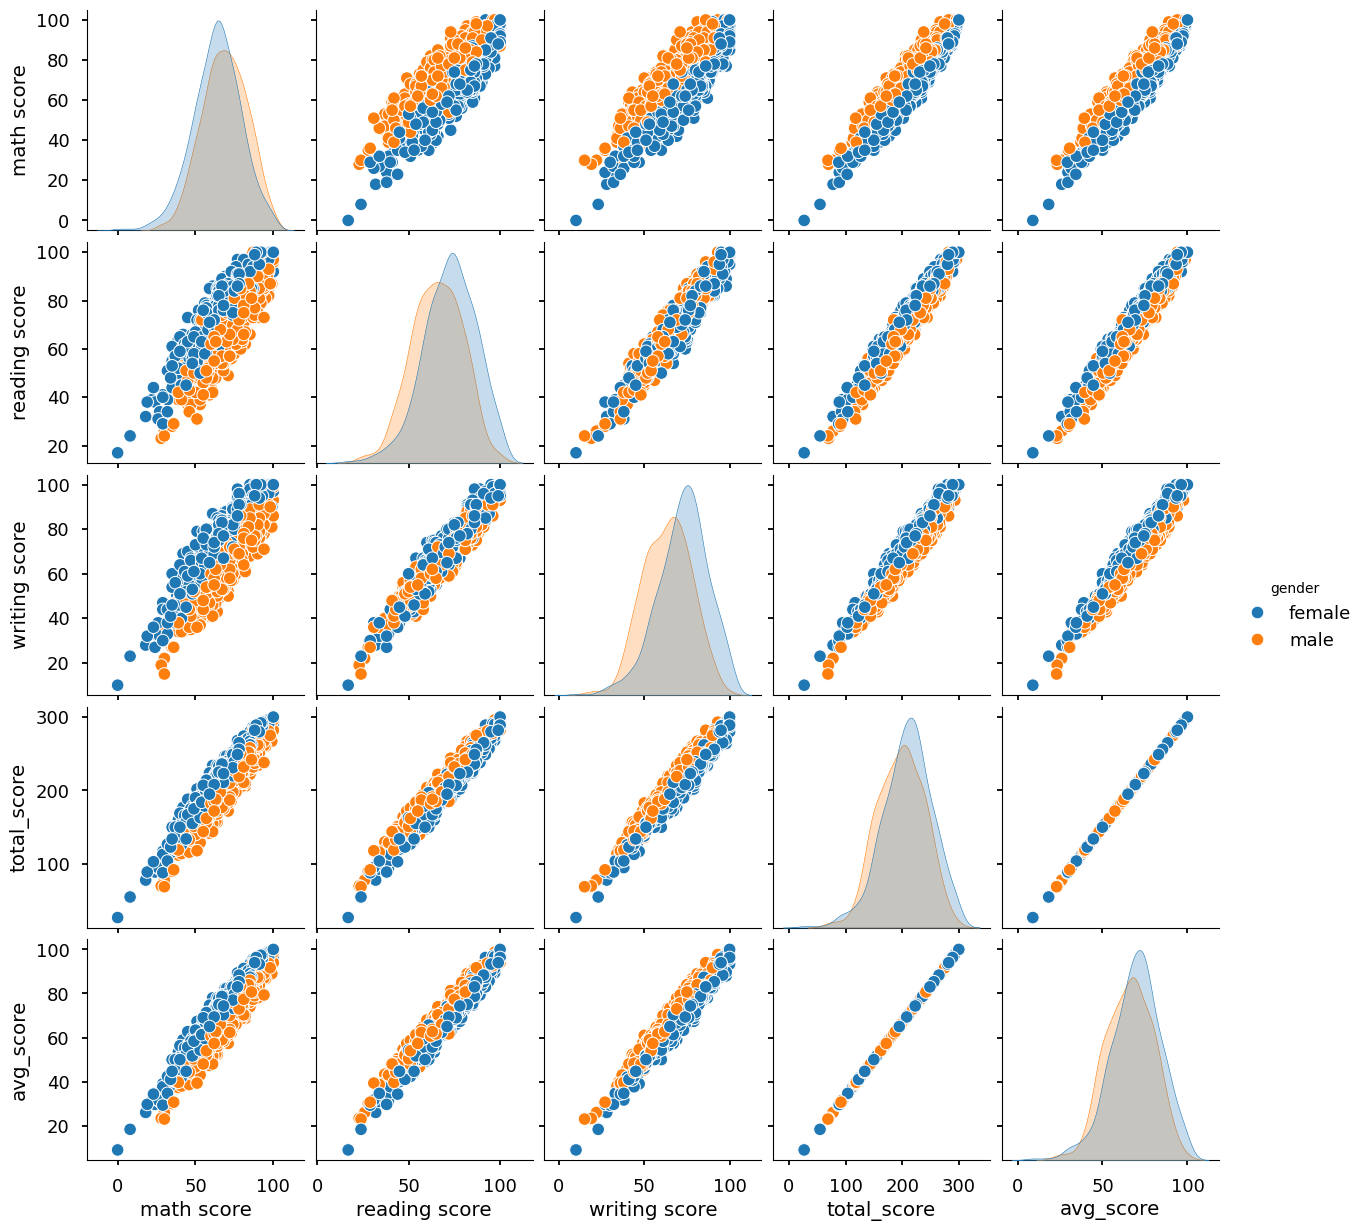

In [133]:
sns.pairplot(df,hue = 'gender')
plt.show()

## Insights
##### From the above plot it is clear that all the scores increase linearly with each other.
# 5. Conclusions
#### Student's Performance is related with lunch, race, parental level education
#### Females lead in pass percentage and also are top-scorers
#### Student's Performance is not much related with test preparation course
#### Finishing preparation course is benefitial.